# **K-Mean Clustering**

## **Apa Itu K-Mean Clustering?**
K-Means clustering adalah algoritma unsupervised machine learning yang digunakan untuk mengelompokkan data ke dalam kelompok-kelompok (kluster) berdasarkan kemiripan karakteristik. Algoritma ini bertujuan untuk meminimalkan jarak antar titik data dalam satu kluster dan memaksimalkan jarak antar kluster.

## **Tujuan dan Langkah-langkah**
**Tujuan**:
K-Means berusaha untuk meminimalkan variasi data dalam setiap kluster dan memaksimalakan variasi data antar kluster.

**Langkah-langkah:**

**Menentukan Jumlah Kluster (k):** Anda harus menentukan jumlah kluster yang diinginkan sebelum menjalankan algoritma.

**Inisialisasi Sentroid:** Sentroid (pusat kluster) diinisialisasi secara acak atau dengan metode tertentu.

**Penugasan Kluster**: Setiap titik data ditugaskan ke kluster terdekat dengan sentroidnya.

**Pemutakhiran Sentroid**: Sentroid kluster dihitung kembali berdasarkan rata-rata titik data dalam kluster tersebut.

**Iterasi**: Langkah 3 dan 4 diulang hingga sentroid tidak berubah atau konvergen.

## **Implementasi**

Import library yang diperlukan dan upload dataset yang belum dihapus label nya

In [43]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
import skfuzzy as fuzz

In [44]:
data = pd.read_csv("/workspaces/pendata/tugas/iris.csv")
data.head()

,id,Class,petal length,petal width,sepal length,sepal width
0,1,Iris-setosa,1.400000,0.200000,5.100000,3.500000
1,2,Iris-setosa,1.400000,0.200000,4.900000,3.000000
2,3,Iris-setosa,1.300000,0.200000,4.700000,3.200000
3,4,Iris-setosa,1.500000,0.200000,4.600000,3.100000
4,5,Iris-setosa,1.400000,0.200000,5.000000,3.600000


## **Normalisasi dan Menghapus Label Class**

**Normalisasi data** adalah proses mengubah skala fitur-fitur (kolom) dalam dataset agar memiliki skala yang seragam, biasanya untuk meningkatkan performa algoritma machine learning seperti K-Means, SVM, dan lainnya.

Ini artinya kamu menerapkan standardisasi, yaitu:


$$
Z = \frac{X - \mu}{\sigma}
$$

- X = nilai asli


- μ = rata-rata dari kolom tersebut


- σ = standar deviasi dari kolom tersebut

- Hasilnya: setiap kolom akan punya rata-rata 0 dan standar deviasi 1

**Mengapa Normalisasi Penting untuk K-Means?**
K-Means clustering menggunakan jarak Euclidean untuk menghitung kedekatan antar data. Jika fitur memiliki skala yang berbeda-beda (misalnya satu fitur dalam cm dan yang lain dalam gram), maka:

- Fitur dengan skala besar akan mendominasi perhitungan jarak

- Hasil clustering bisa menjadi bias dan tidak akurat

Dengan normalisasi:

- Semua fitur berada dalam skala yang sama

- Clustering menjadi lebih adil dan representatif


In [45]:
# Load data iris (tanpa kolom class)
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Tambahkan kolom ID
data['ID'] = data.index

# Siapkan fitur dan normalisasi
fitur = data.drop(columns=['ID'])
scaler = StandardScaler()
fitur_scaled = scaler.fit_transform(fitur)

# Konversi ke DataFrame dan gabungkan ID
fitur_scaled_df = pd.DataFrame(fitur_scaled, columns=fitur.columns)
normalized_data = pd.concat([data[['ID']], fitur_scaled_df], axis=1)

# Tampilkan seluruh data sebagai tabel
pd.set_option('display.max_rows', None)
display(normalized_data)




,ID,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,-0.900681,1.019004,-1.340227,-1.315444
1,1,-1.143017,-0.131979,-1.340227,-1.315444
2,2,-1.385353,0.328414,-1.397064,-1.315444
3,3,-1.506521,0.098217,-1.283389,-1.315444
4,4,-1.021849,1.249201,-1.340227,-1.315444
5,5,-0.537178,1.939791,-1.169714,-1.052180
6,6,-1.506521,0.788808,-1.340227,-1.183812
7,7,-1.021849,0.788808,-1.283389,-1.315444
8,8,-1.748856,-0.362176,-1.340227,-1.315444
9,9,-1.143017,0.098217,-1.283389,-1.447076


## **Mencari SSE dan Silhouette**

**Apa itu SSE?**
SSE mengukur total jarak kuadrat antara tiap titik data dan centroid klasternya.
$$
SSE = \sum_{i=1}^{n} \lVert x_i - \mu_k \rVert^2
$$

x 
i
​
 : titik data ke-i

𝜇
𝑘
​ : centroid dari klaster tempat 
𝑥
𝑖 berada

∥⋅∥ 
2 : jarak Euclidean kuadrat

🔹 Tujuan:
Semakin kecil SSE, berarti titik-titik dalam satu klaster semakin rapat/kompak → hasil clustering lebih baik.

🔹 Catatan:
SSE selalu menurun jika jumlah klaster 
𝑘 bertambah.

Maka, untuk menentukan 
𝑘 terbaik biasanya digunakan Elbow Method:

Cari titik “tekukan” pada grafik SSE vs jumlah klaster.

**Apa itu Silhouette Score?**
Silhouette Score mengukur seberapa baik titik data cocok dengan klasternya sendiri dibanding klaster lain.

Nilai untuk setiap titik:
$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

𝑎
(
𝑖
)
: rata-rata jarak antara titik 
𝑖
dan semua titik lain dalam klaster yang sama

𝑏
(
𝑖
) : jarak rata-rata antara titik 
𝑖
 dan semua titik dalam klaster terdekat lainnya

🔹 Nilai Silhouette:

- +1 +1 = Titik sangat cocok dengan klasternya, dan tidak cocok dengan klaster lain

- 0 0 = Titik berada di batas dua klaster

- < 0 = Titik lebih dekat ke klaster lain (klastering buruk)

🔹 Tujuan:
- Silhouette Score rata-rata tertinggi → klastering paling optimal.

- Cocok untuk membandingkan kualitas klastering dengan jumlah klaster berbeda.




Jumlah Cluster: 2
  SSE: 222.36170496502302
  Silhouette Score: 0.5817500491982808

Jumlah Cluster: 3
  SSE: 191.02473685317958
  Silhouette Score: 0.4798814508199817

Jumlah Cluster: 4
  SSE: 114.35407164049778
  Silhouette Score: 0.3850454053045392


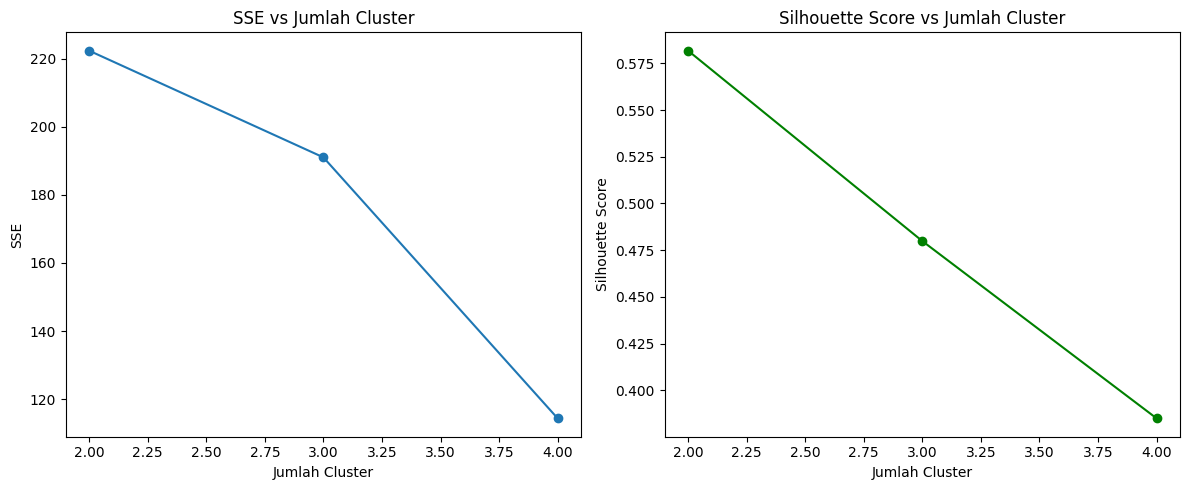

In [46]:
# Simpan hasil SSE dan Silhouette
sse = []
silhouette = []

# Coba jumlah cluster dari 2 sampai 4
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(fitur_scaled)

    sse.append(kmeans.inertia_)  # SSE
    silhouette.append(silhouette_score(fitur_scaled, cluster_labels))  # Silhouette

# Tampilkan hasil
for i, k in enumerate(range(2, 5)):
    print(f"\nJumlah Cluster: {k}")
    print(f"  SSE: {sse[i]}")
    print(f"  Silhouette Score: {silhouette[i]}")

# Visualisasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 5), sse, marker='o')
plt.title('SSE vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(range(2, 5), silhouette, marker='o', color='green')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Clustering akhir dengan k = 3
kmeans_final = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans_final.fit_predict(fitur_scaled)



## **Melihat Data Tiap Cluster**

In [47]:
# Tampilkan ID dan jumlah data per klaster
for i in range(3):
    cluster_data = data[data['Cluster'] == i]
    print(f"\nCluster {i} - Jumlah Data: {len(cluster_data)}")
    print("ID Anggota:", cluster_data['ID'].tolist())

print("\n0 = Setosa")
print("1 = Versicolor")
print("2 = Virginca")

# Tambahkan label asli
data['Target'] = iris.target

# Lihat distribusi label asli per klaster
for i in range(3):
    cluster_data = data[data['Cluster'] == i]
    print(f"\nCluster {i} - Jumlah Data: {len(cluster_data)}")
    print(cluster_data['Target'].value_counts())


Cluster 0 - Jumlah Data: 96
ID Anggota: [50, 51, 52, 53, 54, 55, 56, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]

Cluster 1 - Jumlah Data: 33
ID Anggota: [0, 4, 5, 6, 7, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 31, 32, 33, 36, 37, 39, 40, 43, 44, 46, 48, 49]

Cluster 2 - Jumlah Data: 21
ID Anggota: [1, 2, 3, 8, 9, 12, 13, 25, 29, 30, 34, 35, 38, 41, 42, 45, 47, 57, 60, 93, 98]

0 = Setosa
1 = Versicolor
2 = Virginca

Cluster 0 - Jumlah Data: 96
Target
2    50
1    46
Name: count, dtype: int64

Cluster 1 - Jumlah Data: 33
Target
0    33
Name: count, dtype: int64

Cluster 2 - Jumlah Data: 21
Target
0    17
1 

### **Visualiasi Label Asli dan Hasil Clustering**

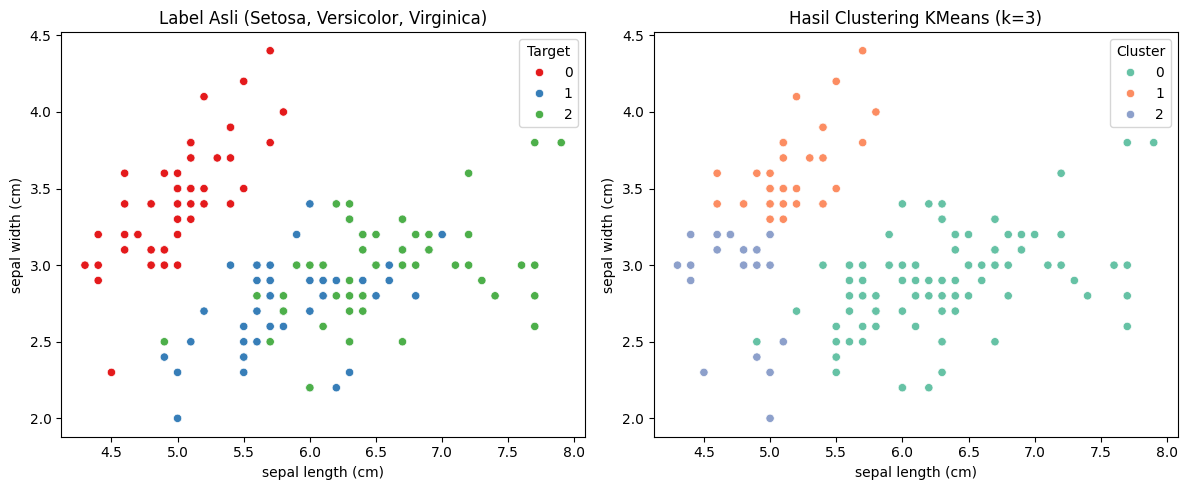

In [48]:
# Load data iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Target'] = iris.target  # label asli

# Normalisasi
scaler = StandardScaler()
fitur_scaled = scaler.fit_transform(data.drop(columns=['Target']))

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(fitur_scaled)

# Visualisasi: label asli
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(
    x=data.iloc[:, 0], y=data.iloc[:, 1],
    hue=data['Target'],
    palette='Set1'
)
plt.title("Label Asli (Setosa, Versicolor, Virginica)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Target')

# Visualisasi: hasil clustering
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=data.iloc[:, 0], y=data.iloc[:, 1],
    hue=data['Cluster'],
    palette='Set2'
)
plt.title("Hasil Clustering KMeans (k=3)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()


## **Akurasi Tiap Cluster**

**Cara Mengukur "Akurasi" Tiap Cluster di K-Means**

Gunakan Label Asli

Kalau data kamu sudah ada label kelas sebenarnya, kamu bisa:

- Mapping cluster ke label asli berdasarkan mayoritas data dalam cluster tersebut.
- Misal cluster 1 berisi sebagian besar data dari kelas "Setosa", maka cluster 1 dianggap merepresentasikan kelas "Setosa".

- Hitung Akurasi Tiap Cluster

Caranya:

Untuk tiap cluster, hitung jumlah data yang sesuai label mayoritas cluster dibagi total data di cluster itu.
Rumus:
$$
\text{Akurasi Cluster} = \frac{\text{Jumlah data dengan label mayoritas di cluster}}{\text{Jumlah data total di cluster}}
$$


   Cluster  Jumlah Data    Akurasi
0        0           96  52.080000
1        1           33 100.000000
2        2           21  19.050000


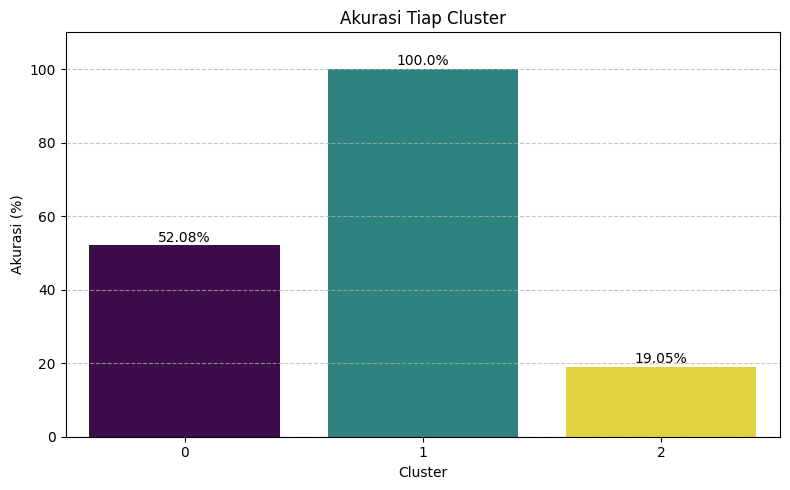

In [49]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# Buat confusion matrix
conf_matrix = confusion_matrix(data['Target'], data['Cluster'])

# Temukan pencocokan terbaik (Hungarian Algorithm)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)

# Buat mapping dari cluster ke label asli
mapping = dict(zip(col_ind, row_ind))

# Tambahkan prediksi label hasil mapping
data['Predicted_Label'] = data['Cluster'].map(mapping)

# Hitung akurasi tiap cluster
cluster_accuracies = []
for cluster_id in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster_id]
    true_labels = cluster_data['Target']
    predicted_labels = cluster_data['Predicted_Label']
    correct = (true_labels == predicted_labels).sum()
    total = len(cluster_data)
    akurasi = correct / total

    cluster_accuracies.append({
        'Cluster': cluster_id,
        'Jumlah Data': total,
        'Akurasi': round(akurasi * 100, 2)
    })

# Tampilkan dalam bentuk tabel
akurasi_df = pd.DataFrame(cluster_accuracies)
print(akurasi_df)

# Visualisasi akurasi tiap cluster
plt.figure(figsize=(8, 5))
sns.barplot(data=akurasi_df, x='Cluster', y='Akurasi', hue='Cluster', palette='viridis', legend=False)

# Tambahkan label akurasi di atas setiap bar
for index, row in akurasi_df.iterrows():
    plt.text(index, row['Akurasi'] + 1, f"{row['Akurasi']}%", ha='center')

plt.title('Akurasi Tiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Akurasi (%)')
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Fuzzy C-Means**

## **Konsep Fuzzy C-Means**

**Fuzzy C-Means (FCM)** adalah suatu metode pengelompokan data dimana data memiliki kecenderungan terhadap kelompok mana saja, fuzzy clustering (soft clustering), setiap titik data memiliki peluang untuk termasuk dalam lebih dari satu kelompok,Logika fuzzy mengukur derajat keanggotaan dalam rentang 0 hingga 1, berbeda dengan logika digital yang hanya memiliki dua nilai, yaitu 1 atau 0. Hal ini memungkinkan data poin untuk "tersebar" di beberapa klaster, dengan tingkat keterikatan yang berbeda-beda. FCM sering digunakan dalam pengolahan data, segmentasi gambar, dan analisis data lainnya. 

**Konsep Fuzzy Logic:**

Fuzzy logic memungkinkan pemrosesan data yang tidak tegas atau eksak, dengan menggunakan konsep "derajat keanggotaan". Ini berbeda dengan metode clustering tradisional yang membagi data ke dalam klaster secara tegas (0 atau 1). 

**Derajat Keanggotaan**:

Dalam FCM, setiap data poin memiliki derajat keanggotaan pada setiap klaster. Derajat ini menunjukkan seberapa besar data poin itu "terikat" pada klaster tersebut. Nilai derajat keanggotaan berkisar antara 0 (tidak terikat) hingga 1 (terikat penuh). 

**Proses Clustering**:

FCM menggunakan algoritma iteratif untuk menentukan pusat-pusat klaster (centroids) dan derajat keanggotaan data poin pada masing-masing klaster. Proses ini melibatkan perhitungan jarak antara data poin dengan pusat-pusat klaster dan pembaruan derajat keanggotaan secara iteratif. 

**Keunggulan**:

FCM memiliki keunggulan dalam menangani data yang memiliki batas-batas yang tidak jelas atau memiliki ciri-ciri yang tumpang tindih. Hal ini membuatnya cocok untuk aplikasi di mana data memiliki tingkat ketidakpastian. 

Contoh pada 5 data dengan 2 fitur

In [50]:
import numpy as np
from scipy.spatial.distance import cdist

# Data: (x1, x2)
X = np.array([
    [1, 2],
    [2, 3],
    [3, 4],
    [6, 7],
    [7, 8]
])

# Derajat keanggotaan awal (dari tabel)
U = np.array([
    [0.5, 0.7, 0.8, 0.7, 0.6],  # Cluster 1
    [0.5, 0.3, 0.2, 0.3, 0.4]   # Cluster 2
])

# Parameter
m = 2  # Fuzziness

def calculate_centers(U, X, m):
    """Hitung pusat cluster berdasarkan derajat keanggotaan"""
    um = U ** m
    centers = (um @ X) / um.sum(axis=1)[:, None]
    return centers

def update_membership(X, centers, m):
    """Update derajat keanggotaan berdasarkan pusat cluster"""
    dist = cdist(X, centers, metric='euclidean')  # shape (samples, clusters)
    dist = np.fmax(dist, 1e-6)  # hindari pembagian nol

    exponent = 2 / (m - 1)
    inv_dist = dist[:, :, None] / dist[:, None, :]
    inv_dist = inv_dist ** exponent
    U_new = 1 / inv_dist.sum(axis=2)
    return U_new.T  # shape (clusters, samples)

# Iterasi Fuzzy C-Means sebanyak 2 kali
for iteration in range(1, 3):
    print(f"\n=== Iterasi {iteration} ===")

    # Hitung pusat cluster
    centers = calculate_centers(U, X, m)
    for i, center in enumerate(centers, 1):
        print(f"c{i} = {center}")

    # Hitung derajat keanggotaan baru
    U = update_membership(X, centers, m)
    print("\nDerajat Keanggotaan (u_ij):")
    for i in range(X.shape[0]):
        print(f"Data {i+1}: Cluster1 = {U[0, i]:.4f}, Cluster2 = {U[1, i]:.4f}")



=== Iterasi 1 ===
c1 = [3.86098655 4.86098655]
c2 = [3.50793651 4.50793651]

Derajat Keanggotaan (u_ij):
Data 1: Cluster1 = 0.4345, Cluster2 = 0.5655
Data 2: Cluster1 = 0.3963, Cluster2 = 0.6037
Data 3: Cluster1 = 0.2582, Cluster2 = 0.7418
Data 4: Cluster1 = 0.5758, Cluster2 = 0.4242
Data 5: Cluster1 = 0.5531, Cluster2 = 0.4469

=== Iterasi 2 ===
c1 = [4.60336854 5.60336854]
c2 = [3.20743845 4.20743845]

Derajat Keanggotaan (u_ij):
Data 1: Cluster1 = 0.2729, Cluster2 = 0.7271
Data 2: Cluster1 = 0.1770, Cluster2 = 0.8230
Data 3: Cluster1 = 0.0165, Cluster2 = 0.9835
Data 4: Cluster1 = 0.7999, Cluster2 = 0.2001
Data 5: Cluster1 = 0.7146, Cluster2 = 0.2854


## **Menggunakan Fungsi Objektif**

Fungsi objektif 
𝐽
𝑚
J 
m
​
  pada Fuzzy C-Means adalah:
$$
J_m = \sum_{i=1}^{N} \sum_{j=1}^{C} u_{ji}^{m} \cdot \| x_i - c_j \|^2
$$

Dimana:

𝑁: jumlah data

𝐶: jumlah cluster

𝑢
𝑗
𝑖
: derajat keanggotaan data ke-i ke cluster j

𝑐
𝑗
: pusat cluster ke-j

𝑚: tingkat fuzzy (biasanya 2)

In [51]:
import numpy as np
from scipy.spatial.distance import cdist

# Data input
X = np.array([
    [1, 2],
    [2, 3],
    [3, 4],
    [6, 7],
    [7, 8]
])

# Inisialisasi keanggotaan awal
U = np.array([
    [0.5, 0.7, 0.8, 0.7, 0.6],  # Cluster 1
    [0.5, 0.3, 0.2, 0.3, 0.4]   # Cluster 2
])

# Parameter
m = 2
epsilon = 1e-4
max_iter = 100

def calculate_centers(U, X, m):
    um = U ** m
    centers = (um @ X) / um.sum(axis=1)[:, None]
    return centers

def update_membership(X, centers, m):
    dist = cdist(X, centers, metric='euclidean')
    dist = np.fmax(dist, 1e-6)
    exponent = 2 / (m - 1)
    inv_dist = dist[:, :, None] / dist[:, None, :]
    inv_dist = inv_dist ** exponent
    U_new = 1 / inv_dist.sum(axis=2)
    return U_new.T

def objective_function(U, X, centers, m):
    dist = cdist(X, centers, 'euclidean')  # shape: (N, C)
    um = U.T ** m  # transpose supaya shape jadi (N, C)
    Jm = np.sum(um * (dist ** 2))
    return Jm

# Simpan histori
history = []

for iteration in range(max_iter):
    centers_old = calculate_centers(U, X, m)
    U_new = update_membership(X, centers_old, m)
    centers_new = calculate_centers(U_new, X, m)

    # Hitung fungsi objektif
    Jm = objective_function(U_new, X, centers_new, m)

    history.append({
        'iteration': iteration + 1,
        'centers': centers_new.copy(),
        'membership': U_new.copy(),
        'objective': Jm
    })

    # Cek konvergensi
    if np.linalg.norm(centers_new - centers_old) < epsilon:
        break

    U = U_new.copy()

# Tampilkan hasil akhir
final = history[-1]
print(f"Konvergen pada iterasi ke-{final['iteration']}")
print(f"Nilai fungsi objektif akhir: {final['objective']:.4f}\n")

print("Pusat Cluster:")
for i, c in enumerate(final['centers'], 1):
    print(f"c{i} = {c}")

print("\nDerajat Keanggotaan Terakhir:")
for i in range(X.shape[0]):
    print(f"Data {i+1}: Cluster1 = {final['membership'][0, i]:.4f}, Cluster2 = {final['membership'][1, i]:.4f}")


Konvergen pada iterasi ke-8
Nilai fungsi objektif akhir: 4.7665

Pusat Cluster:
c1 = [6.48791075 7.48791075]
c2 = [1.96610315 2.96610315]

Derajat Keanggotaan Terakhir:
Data 1: Cluster1 = 0.0301, Cluster2 = 0.9699
Data 2: Cluster1 = 0.0001, Cluster2 = 0.9999
Data 3: Cluster1 = 0.0808, Cluster2 = 0.9192
Data 4: Cluster1 = 0.9856, Cluster2 = 0.0144
Data 5: Cluster1 = 0.9898, Cluster2 = 0.0102


## **Implementasi pada data iris**

Kode ini melakukan clustering data iris menggunakan metode Fuzzy C-Means.

Singkatnya:

Data iris dimuat dan fitur dinormalisasi.

Fuzzy C-Means diterapkan untuk mengelompokkan data menjadi 3 cluster.

Setiap data diberi label cluster berdasarkan keanggotaan tertinggi.

Hasil clustering ditampilkan dalam tabel dan divisualisasikan pada plot dua fitur pertama.

Jadi, kode ini bertujuan mengelompokkan data iris secara fuzzy dan menampilkan hasilnya.

Length of cluster_labels: 150
      ID  sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  Cluster
0      0          -0.900681          1.019004          -1.340227         -1.315444        1
1      1          -1.143017         -0.131979          -1.340227         -1.315444        1
2      2          -1.385353          0.328414          -1.397064         -1.315444        1
3      3          -1.506521          0.098217          -1.283389         -1.315444        1
4      4          -1.021849          1.249201          -1.340227         -1.315444        1
5      5          -0.537178          1.939791          -1.169714         -1.052180        1
6      6          -1.506521          0.788808          -1.340227         -1.183812        1
7      7          -1.021849          0.788808          -1.283389         -1.315444        1
8      8          -1.748856         -0.362176          -1.340227         -1.315444        1
9      9          -1.143017          0.098217     

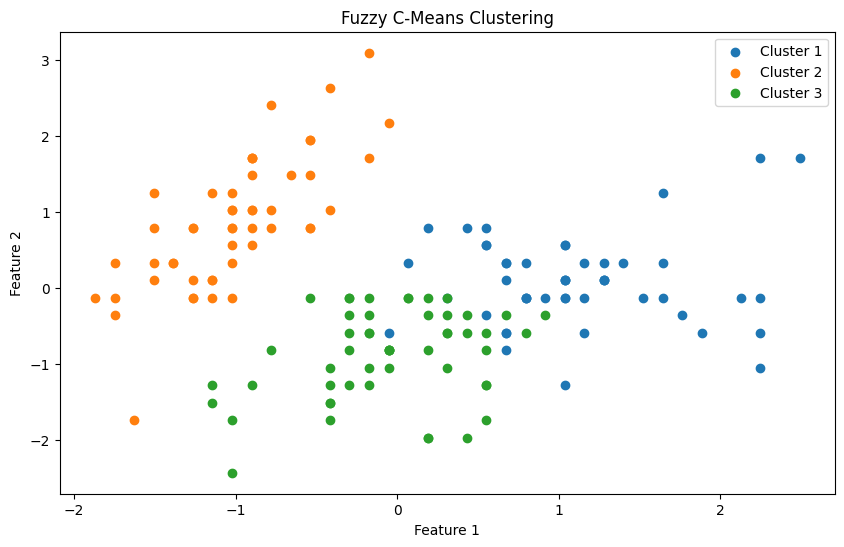

In [52]:

# Load data iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Tambahkan kolom ID
data['ID'] = data.index

# Siapkan fitur dan normalisasi
fitur = data.drop(columns=['ID'])
scaler = StandardScaler()
fitur_scaled = scaler.fit_transform(fitur)

# Konversi ke DataFrame dan gabungkan ID
fitur_scaled_df = pd.DataFrame(fitur_scaled, columns=fitur.columns)
normalized_data = pd.concat([data[['ID']], fitur_scaled_df], axis=1)

# Fuzzy C-Means Clustering
# Tentukan jumlah cluster
n_clusters = 3

# Fuzzy C-Means
# Uji dengan 100 iterasi
# Fuzzy C-Means
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    fitur_scaled.T,  # Transpose to match shape
    c=n_clusters, 
    m=2,  # Fuzziness parameter
    error=0.005, 
    maxiter=1000, 
    init=None
)

# Menentukan label cluster
# Ambil label cluster dengan nilai maksimum untuk setiap data point
cluster_labels = np.argmax(u, axis=0)

# Check the length of cluster_labels
print("Length of cluster_labels:", len(cluster_labels))

# Menambahkan label cluster ke DataFrame
normalized_data['Cluster'] = cluster_labels

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line breaks
pd.set_option('display.float_format', '{:.6f}'.format)  # Format floats

# Create the output table with the desired columns
output_table = normalized_data[['ID', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Cluster']]

# Display the entire output table
print(output_table)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.scatter(fitur_scaled[cluster_labels == i, 0], 
                fitur_scaled[cluster_labels == i, 1], 
                label=f'Cluster {i+1}')
plt.title('Fuzzy C-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
